# Perceptron 感知机

Python 实现感知机。

感知机（perceptron）是二分类的**线性分类**模型，其输入为实例的特征向量，输出为实例的类别。
$$f(x)=\operatorname{sign}(w \bullet x+b)$$
$$\operatorname{sign}(x)=\left\{\begin{array}{l}
+1, x \geq 0 \\
-1, x<0
\end{array}\right.$$

假设训练数据集是线性可分的，感知机学习的目的是求得一个能够将训练集整实例点和负实例点完全正确分开的分离超平面。感知机是神经网络和支持向量机的基础。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 定义 Perceptron 模型

In [2]:
class Perceptron:
    def __init__(self, learning_rate = 1, max_iter = 1000):
        self.w = None
        self.b = 0
        self.l_rate = learning_rate
        self.max_iter = max_iter
        self.n_iter = 1

    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1])
        
        self.n_iter = 1        
        while self.n_iter <= self.max_iter:
            for index in range(len(X_train)):
                x = X_train[index]
                y = y_train[index]
                if y*(np.dot(self.w, x) + self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
            self.n_iter += 1
    
    def predict(self, input_x):
        output = []
        for x in input_x:
            predict_y = sum([self.w[j] * x[j] for j in range(len(self.w))]) + self.b
            output.append(1 if predict_y > 0 else -1)
        return np.array(output)

## 模型训练

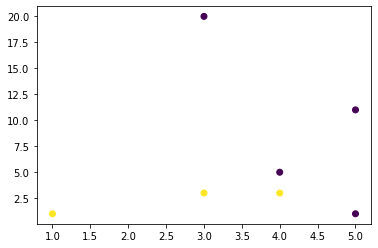

In [3]:
X_train = np.array([[3, 3], [4, 3],  [5, 11], [1, 1], [4, 5], [5, 1], [3, 20]])
y_train = np.array([1, 1, -1, 1, -1, -1, -1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [4]:
# 实例化模型
model = Perceptron(learning_rate = 1, max_iter = 1000)
model.fit(X_train, y_train)

print(model.w)
print(model.b)
print(model.n_iter)

[-12.  -2.]
56
1001


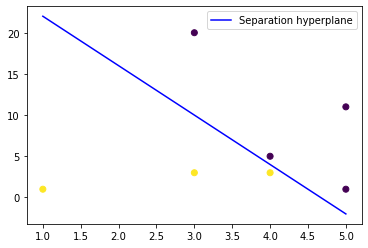

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

minX = np.min(X_train[:, 0])
maxX = np.max(X_train[:, 0])
line_x = np.array([minX, maxX])

line_y = -(model.w[0] * line_x + model.b) / model.w[1]
plt.plot(line_x, line_y, 'b-', label='Separation hyperplane')
plt.legend()
plt.show()

## 增加数据量

尝试增加数据量，用 sklearn 的 make_classification 生成 1000 个数据。

In [6]:
from sklearn.datasets import make_classification

# n_features = n_informative + n_redundant + n_repeated； 
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1)
y = np.array([1 if i == 1 else -1 for i in y])

# 训练数据和测试数据; 800个训练集，剩下的用于评估模型
X_data_train = X[:800,:]
X_data_test = X[800:,:]
y_data_train = y[:800]
y_data_test = y[800:]

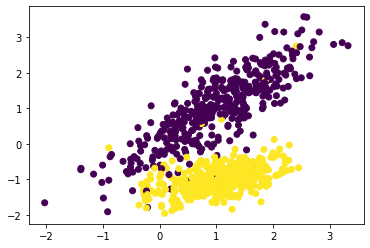

In [7]:
plt.scatter(X_data_train[:, 0], X_data_train[:, 1], c=y_data_train)

In [8]:
# 实例化模型
model = Perceptron()
model.fit(X_data_train, y_data_train)

print(model.w)
print(model.b)

[ 2.26563438 -3.85491654]
-2


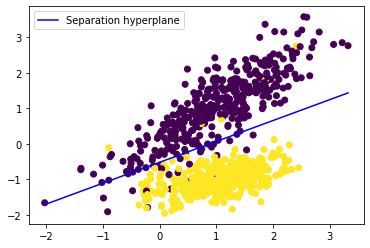

In [9]:
plt.scatter(X_data_train[:, 0], X_data_train[:, 1], c=y_data_train)

minX = np.min(X_data_train[:, 0])
maxX = np.max(X_data_train[:, 0])
line_x = np.array([minX, maxX])

line_y = -(model.w[0] * line_x + model.b) / model.w[1]
plt.plot(line_x, line_y, 'b-', label='Separation hyperplane')
plt.legend()
plt.show()